## Preliminaries


In [1]:
## Import libraries
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd 
import numpy as np
import seaborn as sns
import sklearn as sk 
import scipy 
 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score, mean_squared_error
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc, plot_roc_curve
from scipy.stats import norm

## Dataset

This dataset ("DataSet") is a subset of a dataset which contains years of daily observations of the weather at many geographical locations across a country.

The main purpose of the dataset is to predict Raining on a day as a "Yes" or "No". 
When the rain is 1 mm or more the answer is "Yes", and "No" otherwise. 
The Observations are drawn from numerous weather stations. 

The variables are ientified as follows:

1. Date - The date string of the recorded information (year-month-day) 
2. MinTemp - Minimum temperature in the 24 hours to 9am. Sometimes only known to the nearest whole degree (degrees Celsius).
3. MaxTemp - Maximum temperature in the 24 hours to 9am. Sometimes only known to the nearest whole degree (degrees Celsius).
4. Rainfall - Precipitation (rainfall) in the 24 hours to 9am. Sometimes only known to the nearest whole millimetre (millimetres).
5. Evaporation - "Class A" pan evaporation in the 24 hours to 9am (milimeters).
6. Sunshine - Bright sunshine in the 24 hours to midnight (hours).
7. WindGustSpeed - Speed of strongest wind gust in the 24 hours to midnight (killometers per hour).
8. WindDir - Direction of strongest wind gust in the 24 hours to midnight (4 compass points North, South, East, West).
9. WindSpeed9am - Wind speed averaged over 10 minutes prior to 9 am (killometers per hour).
10. WindSpeed3am - Wind speed averaged over 10 minutes prior to 3 pm (killometers per hour).
11. Humidity - Relative humidity (percent).
12. Pressure9am - Atmospheric pressure reduced to mean sea level at 9 am (hectopascals).
13. Pressure3pm - Atmospheric pressure reduced to mean sea level at 3 pm (hectopascals).
14. Cloud9am - Fraction of sky obscured by cloud at 9 am (eighths).
15. Cloud3pm - Fraction of sky obscured by cloud at 3 pm (eighths).
16. Temp9am - Temperature at 9 am (degrees Celsius).
17. Temp3pm - Temperature at 3 pm (degrees Celsius).
18. RainToday - Raining today ("Yes"/"No").
19. RainTomorrow - Raining tomorrow ("Yes"/"No").




## Linear Regression - Predicting the amount of Rainfall (65 pts)

In [5]:
df = pd.read_csv('DataSet.csv')
df.describe()   


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,13.414333,23.428335,4.402867,5.105072,7.054686,43.628445,17.275634,20.678060,53.879824,1016.186880,1013.828115,4.558986,4.697905,17.774862,21.857552
std,6.417740,7.261593,11.423447,3.410964,3.962936,14.703012,8.924449,8.995093,21.092195,7.214124,7.111339,2.833417,2.662640,6.692285,7.187933
min,-2.500000,7.200000,0.000000,0.000000,0.000000,15.000000,2.000000,2.000000,1.000000,988.300000,987.300000,0.000000,0.000000,3.200000,4.800000
25%,8.600000,17.200000,0.000000,2.600000,3.800000,33.000000,11.000000,13.000000,39.000000,1011.300000,1008.900000,2.000000,2.000000,12.100000,15.900000
50%,12.900000,23.500000,0.000000,4.400000,7.800000,41.000000,17.000000,20.000000,55.000000,1016.100000,1013.800000,6.000000,6.000000,17.100000,21.700000
75%,18.500000,29.500000,4.200000,7.000000,10.300000,52.000000,22.000000,26.000000,68.000000,1021.250000,1018.850000,7.000000,7.000000,23.200000,27.550000
max,29.700000,42.900000,168.400000,22.800000,13.800000,100.000000,59.000000,54.000000,100.000000,1038.800000,1036.600000,8.000000,8.000000,39.000000,41.400000


### Preprocessing
* Drop the variables: 'RainToday','RainTomorrow'.

* Use "Date" variable to find the numerical variable 'Month'. Therefore, you will have an additional column 'Month'. Then dummmy code "Month" and drop the variable "Date". 
* Find all other catecorical variables and Dummy code them (One Hot Encoding) and drop the first column for each variable.


In [6]:
df = df.drop(['RainToday', 'RainTomorrow'], axis='columns') #Drop the variables

df['Date'] = pd.to_datetime(df['Date']) #convert 'Date' into datetime format 
df['Month'] = df['Date'].dt.month # extract month from date

df.drop('Date', axis=1, inplace = True) #Drop the variable

df = pd.get_dummies(df, drop_first=True, columns=['Month', 'WindDir'])
df.info() #optional

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        907 non-null    float64
 1   MaxTemp        907 non-null    float64
 2   Rainfall       907 non-null    float64
 3   Evaporation    907 non-null    float64
 4   Sunshine       907 non-null    float64
 5   WindGustSpeed  907 non-null    int64  
 6   WindSpeed9am   907 non-null    int64  
 7   WindSpeed3pm   907 non-null    int64  
 8   Humidity       907 non-null    int64  
 9   Pressure9am    907 non-null    float64
 10  Pressure3pm    907 non-null    float64
 11  Cloud9am       907 non-null    int64  
 12  Cloud3pm       907 non-null    int64  
 13  Temp9am        907 non-null    float64
 14  Temp3pm        907 non-null    float64
 15  Month_2        907 non-null    uint8  
 16  Month_3        907 non-null    uint8  
 17  Month_4        907 non-null    uint8  
 18  Month_5   

We had 12 months and 4 directions in "Month" and 'WindDir' and we dropped the first column for both. So we added (12 - 1) + (4 - 1) = 14 new variables.

### Q 1.3: Visualization

Plotting the joint distribution between the Rainfall and the MinTemp and show the marginal distributions of those two variables in the plot as well.   

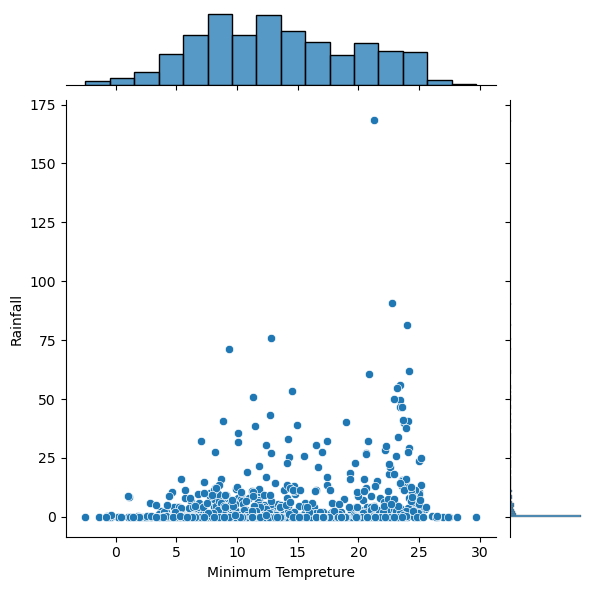

In [7]:
ax = sns.jointplot(x=df['MinTemp'],y=df['Rainfall'])
ax.ax_joint.set_xlabel('Minimum Tempreture')
ax.ax_joint.set_ylabel('Rainfall')
plt.show()

We can see the Rainfall has a very skewed distribution. It is not completely clear if MinTemp and Rainfall are related given this skewness, but they appear to be positively correlated (move in the same direction).

### Transformation

Logarithm transformation is one of the most commonly used mathematical transformations in feature engineering to approximate the distribution close to normal. Given the distribution of the Rainfall variable, use the logarithm of the Rainfall instead of the original variable as a new target variable and add to the dataset (name it ```LogRainfall```) where $LogRainfall = log(Rainfall + 1)$. (You add 1 because the data you apply log transform must have only positive values).  

Plot the joint distribution of the new variable ```LogRainfall``` and the MinTemp. 


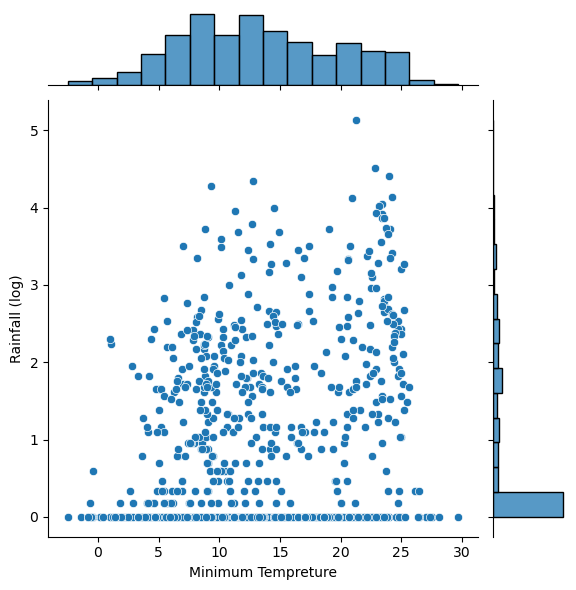

In [8]:
# Create the logarithmic transformation [1pt]
df['LogRainfall'] = np.log(df['Rainfall'] + 1)

# Plot relationship [1pt]
ax = sns.jointplot(x=df['MinTemp'], y=df['LogRainfall'])
ax.ax_joint.set_xlabel('Minimum Tempreture')
ax.ax_joint.set_ylabel('Rainfall (log)')
plt.show()


Log transform helped to handle skewed data and after transformation, the distribution became more approximate to normal. It seems to be a slight positive trend between two variables.

### Regression Analysis 

In [9]:
# Separate targets (Rainfall and LogRainfall) from the dataset (columns 2 and 29), we know its 2 and 29 because our results in 1.2 show it
# we would see rainfall in column 2. Then it ends at 28 so when we add logRainfall it would be in the last collumn which is 29 here.
# and use the rest as fetures for prediction
featurs = np.r_[0:2, 3:29]
targets = np.r_[2, 29]

# Split train and test
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, featurs],
                                                    df.iloc[:, targets],
                                                    test_size=0.3, 
                                                    random_state=1)

# Linear regression models
Rainfall_reg = LinearRegression()
logRainfall_reg = LinearRegression()

# Fit models
Rainfall_reg.fit(x_train, y_train.iloc[:,0])
logRainfall_reg.fit(x_train, y_train.iloc[:,1])

# Predict
pred_Rainfall = Rainfall_reg.predict(x_test)
pred_logRainfall = logRainfall_reg.predict(x_test)
pred_logRainfall = np.exp(pred_logRainfall) - 1

# Report mean absolute error (MAE)
mae_Rainfall = mean_absolute_error(y_test.iloc[:, 0], pred_Rainfall)
mae_logRainfall = mean_absolute_error(y_test.iloc[:, 0], pred_logRainfall)

print('The MAE of the Rainfall regression is %.3f and the MAE of the log-Rainfall regression is %.3f' % (mae_Rainfall, mae_logRainfall))

The MAE of the Rainfall regression is 5.612 and the MAE of the log-Rainfall regression is 4.060


The results show that the logarithmic model is the more accurate model, with smaller error. For the untransformed data, the distribution is very sweked, so the model will be very sensitive to the outliers. This makes the predictions variable. For the model trained on log-transformed outputs, this effect is mitigated and predictions become less variable.

## Regularized model
We will build a reqularized regression model and observe the effect of regularization. **Evaporation** will be used as target variable.


In [10]:
df = pd.read_csv('DataSet.csv')
df = df.drop(['RainToday'], axis='columns')
df = df.drop(['RainTomorrow'], axis='columns')
# df = df.drop(['WindDir'], axis='columns')
df['Date'] = pd.to_datetime(df['Date'])

# extract month from date

df['Month'] = df['Date'].dt.month
df.drop('Date', axis=1, inplace = True)
# df = pd.get_dummies(df, drop_first=True, columns=['Month'])  # We just commented this out
df = pd.get_dummies(df, drop_first=True, columns=['WindDir'])


### Fourier Transforms
Fourier Transform is a reasonable option to encode periodic data. 

Write a function `FourierExpansion(x,order)`, which takes a variable `x` scaled between 0 and 1 (scale by dividing to the maximum value), and returns a design matrix that has order times 2 columns. The first 2 columns should be set to: 

$sin(2 \pi x)$

$cos(2 \pi x)$

The next two columns: 

$sin(4 \pi x)$

$cos(4 \pi x)$

$...$

and the last two columns: 

$sin(2 order \pi x)$

$cos(2 order \pi x)$


In [11]:
def FourierExpansion(x,order):
    x=x*2*np.pi
    X=np.zeros((x.shape[0],0))
    for i in range(order):
        f = i+1; 
        X = np.c_[X,np.sin(f*x),np.cos(f*x)]
    return X 

### Q 2.3  (20 pts)  

In [12]:
# Create the 2 design matrices 
X1 = np.c_[FourierExpansion(df.Month/12, 6)]
X1 = np.delete(X1, 2, axis=1)
X2 = np.c_[pd.get_dummies(df.Month, drop_first=True)]

# Build and evaluate the regression models 
linreg1 = LinearRegression(fit_intercept=True) 
linreg1.fit(X1, df.Evaporation)
r2_1 = linreg1.score(X1, df.Evaporation)

linreg2 = LinearRegression(fit_intercept=True) 
linreg2.fit(X2,df.Evaporation)
r2_2 = linreg2.score(X2,df.Evaporation)


print(f'R2 Model 1: %.3f' % (r2_1))
print(f'R2 for Model 2: %.3f' % (r2_2))


R2 Model 1: 0.366
R2 for Model 2: 0.366


Both models fit the data equally well - they both have 11 features which together with the intercept can fit any arbitary non-linear function of month.

### Testing outcomes
a) Modify your dummy encoding model (Model 2 from Q2.3), by **NOT dropping** the first column. This design matrix should have 12 regressors now. 

b) Build a pipeline, which first applies z-Standardization to each column of the design matrix and then fit an L2-regularlized linear model.

c) Do a grid search, varying the regularization parameter between $exp(-5)$ and $exp(4)$ in 10 steps for the fourier-encoded model, (Model 1 from Q2.3). Evaluate each setting of $\lambda$ using the mean-squared-error with 10-fold cross-validation. Plot the average validation error (y-axis) against $log(\lambda)$ (x-axis). (*Hint: If you did not succeed in generating a fourier feature set, use `polynomialFeatures` to make a polynomial feature set for month of order 11.*) 

d) Repeat (c), this time using the dummy-coded feature set (modified Model 2 from Q2.3, in part a of this question). Plot the average validation error with a different color in the same plot as part (c), so you can compare the models. 

e) Report the $\lambda$ value for each model that gives the best validation error. 

**Written answer:** Why don't the two models behave the same way, as they did in Q2.3? 

Model 1 lambda: 37.363
Model 2 lambda: 26.466


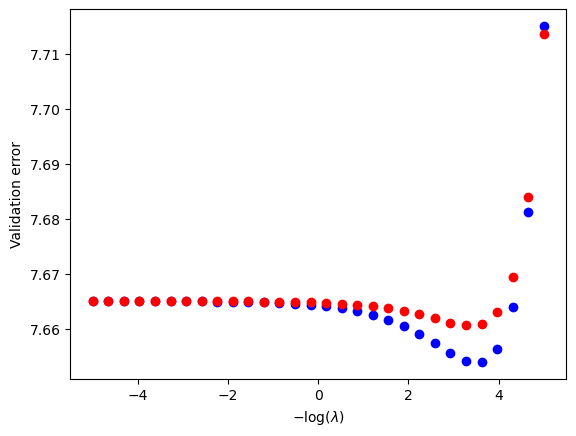

In [13]:
# a. Generate new dummy encoding but not dropping the first column
X2 = np.c_[pd.get_dummies(df.Month,drop_first=False)]

# b. Build the pipeline with StandardScaler and Ridge 
pip = Pipeline([
    ('std', StandardScaler()),
    ('reg', Ridge())
    ])

# c. Grid search 
log_lambda = np.linspace(-5,5,30)
params = {'reg__alpha': np.exp(log_lambda)}
gscv1 = GridSearchCV(pip, param_grid=params, cv=10, scoring = 'neg_mean_squared_error', refit=True)
gscv1.fit(X1, df.Evaporation)
MSE1 = -gscv1.cv_results_['mean_test_score']
plt.scatter(log_lambda, MSE1,color='b')

# d. 
gscv2 = GridSearchCV(pip, param_grid=params, cv=10, scoring = 'neg_mean_squared_error', refit=True)
gscv2.fit(X2, df.Evaporation)
MSE2 = -gscv2.cv_results_['mean_test_score']
plt.scatter(log_lambda, MSE2,color='r')

plt.xlabel(r'$-\log(\lambda)$')
plt.ylabel('Validation error')


# e. Report the best regularization parameter 
lambda1 = gscv1.best_params_['reg__alpha']
lambda2 = gscv2.best_params_['reg__alpha']
print(f'Model 1 lambda: %.3f' % lambda1)
print(f'Model 2 lambda: %.3f' % lambda2)

The two models behave differently - with the fourier set achieving lower validation error needing a bigger value of the regularization parameter. Regulatization pushes two models towards different solutions.